In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

plt.rcParams['figure.figsize'] = 20, 10
plt.style.use('dark_background')
plt.rcParams['axes.grid'] = False

In [2]:
df = pd.read_pickle('./data/scraped_data')

In [3]:
from matplotlib import cm

def get_color_spectrum(start, end, n, flipped= False, spectrum = "seismic"):
    if flipped:
        return eval(f'cm.{spectrum}(np.linspace(start, end, n))[::-1]')
    return eval(f'cm.{spectrum}(np.linspace(start, end, n))')

In [4]:
def plot_bar_values(plot, values, xoffset= 1, yoffset= 0.2, type_ = 'v', fontdict= None, **kwargs):
    '''Parameters:
    --------------
    • plot: 
    x = plt.plot()
    Then `x` becomes the `plot`
    
    • values: series.values
    
    • xoffset, yoffset - Self explanatory
    
    • type_: This should be 'h' or 'v' depending on the type of your plot.
    '''
    for patch, val in zip(plot.patches, values):
        x = patch.get_width() if type_ == 'h' else patch.get_x()
        y = patch.get_y() if type_ == 'h' else patch.get_height()
        plt.text(x + xoffset, y + yoffset, str(val), fontdict= fontdict, **kwargs)

In [5]:
background = "#fffbf2"
front = "#424242"

In [27]:
plt.rcParams['figure.facecolor'] = background
plt.rcParams['font.family'] = 'Neuville'
plt.rcParams['text.color'] = front
plt.rcParams['axes.labelcolor'] = front
plt.rcParams['axes.facecolor'] = background
plt.rcParams['xtick.color'] = front
plt.rcParams['ytick.color'] = front

Here we can see that for the most of the cases, we are having Courrsera Project Network as a leading source of the program in the field of python. But, when I tried to look at - Coursera project network provides the "GUIDED PROJECT". Which is a type of the program. If we are just interested in the courses like specialization and certifications, then this graph is helpful.

In [7]:
savepath = "./webpage/static/"

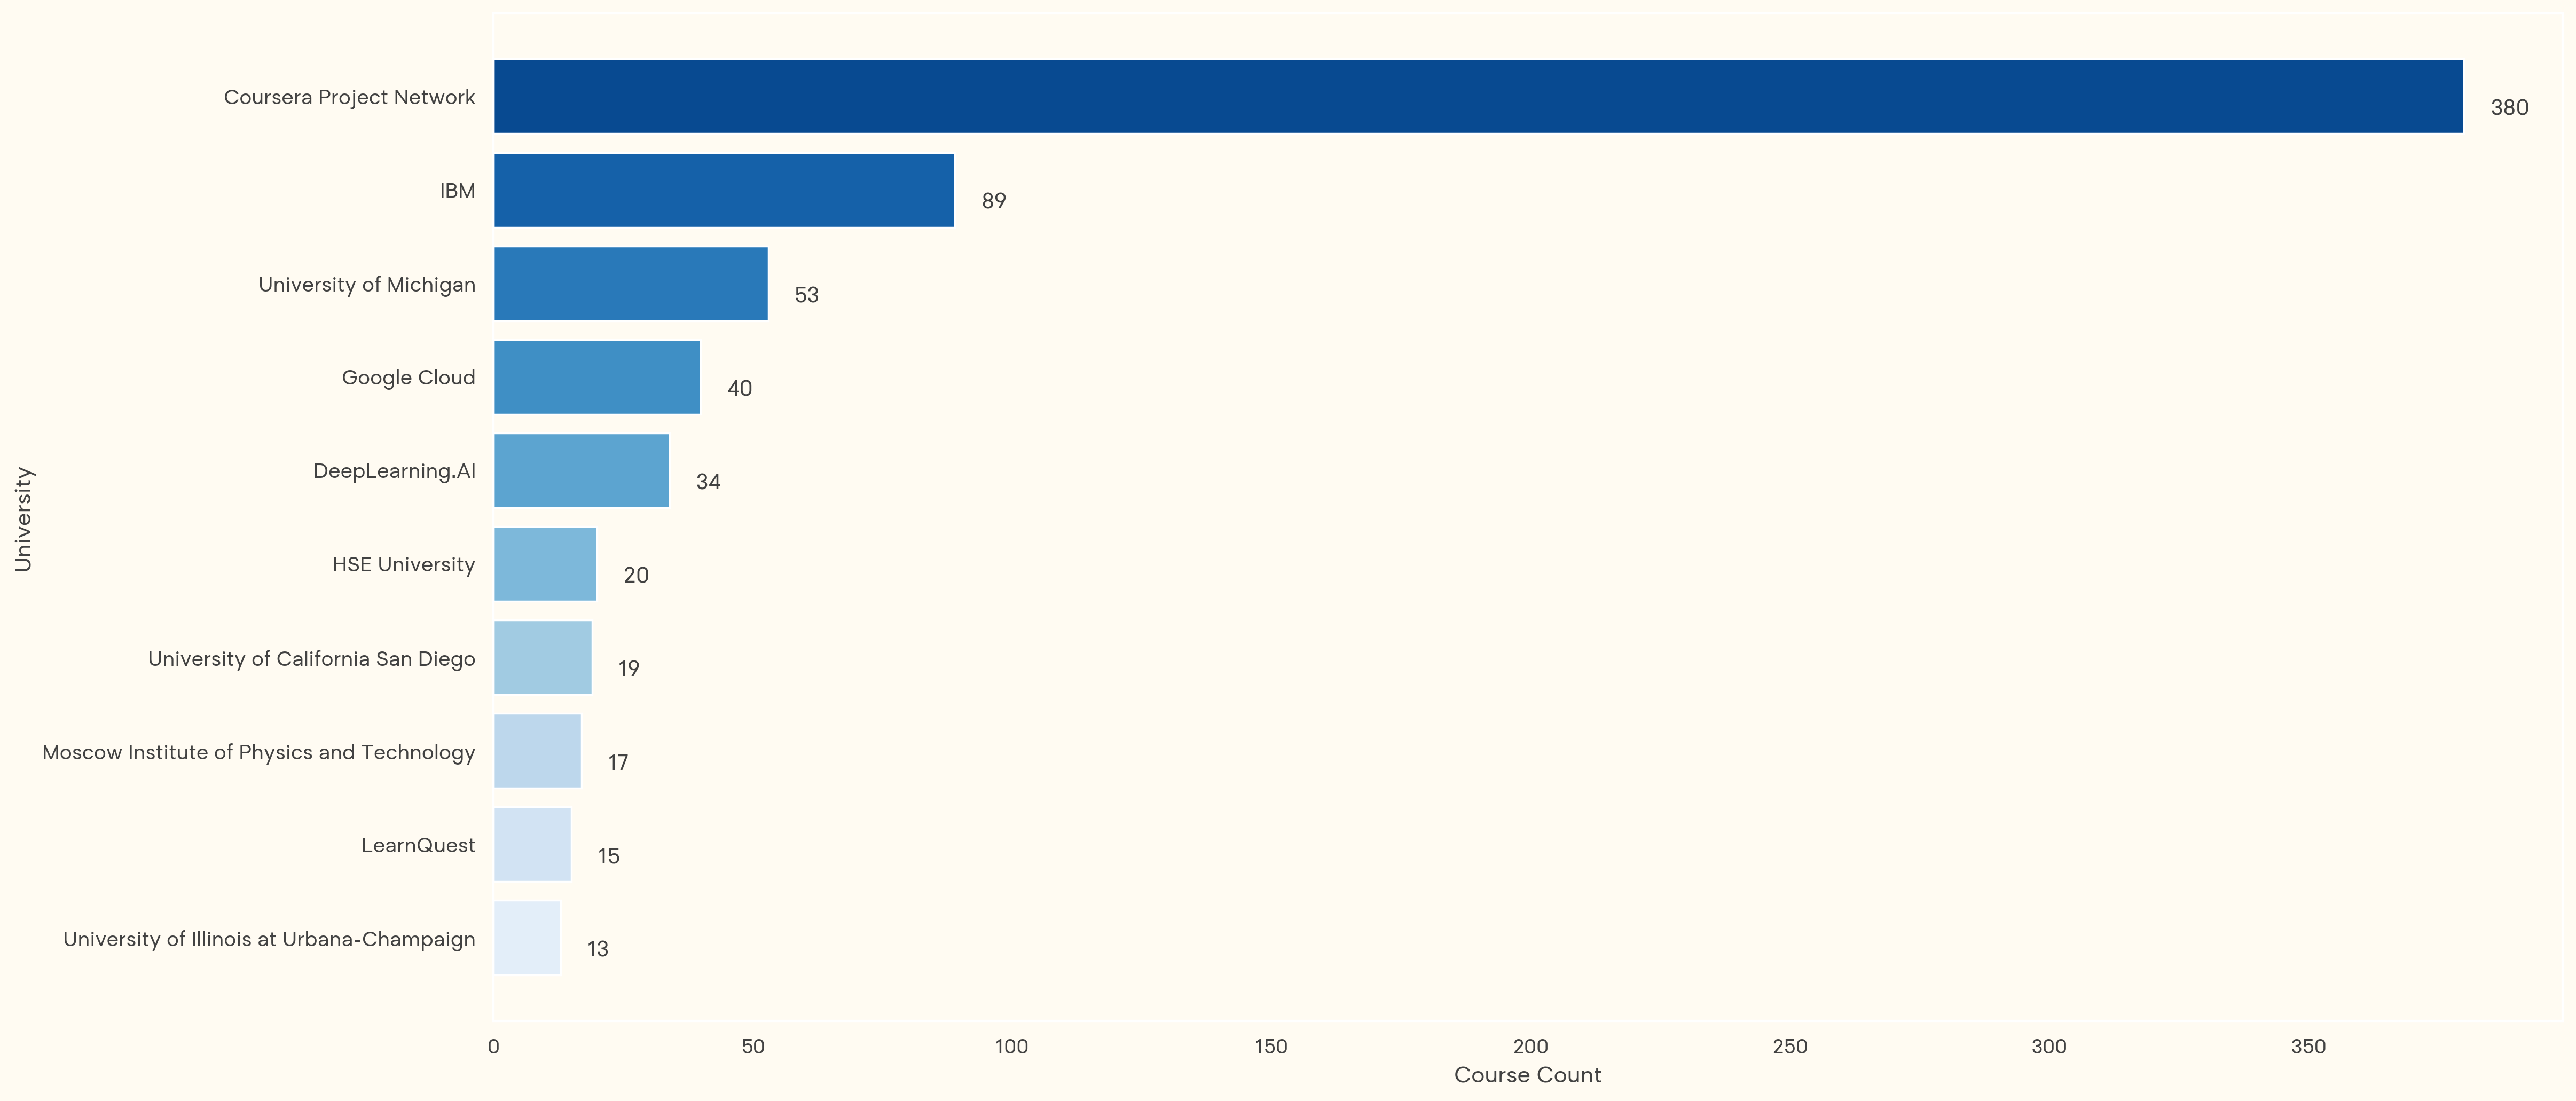

In [21]:
fig = plt.figure(dpi= 250)
ax = plt.axes()
ax.set_facecolor(background)
ax.set(xlabel= "Course Count", ylabel= "University")
topUni = df.university.value_counts()[:10][::-1]
plot = plt.barh(topUni.index, topUni.values, color= get_color_spectrum(.1, .9, 10, flipped= False, spectrum= 'Blues'))
plot_bar_values(plot, topUni.values, type_= 'h', xoffset= 5)


fig.savefig(savepath + 'top10uniCourses.png', bbox_inches= 'tight', transparent= True)

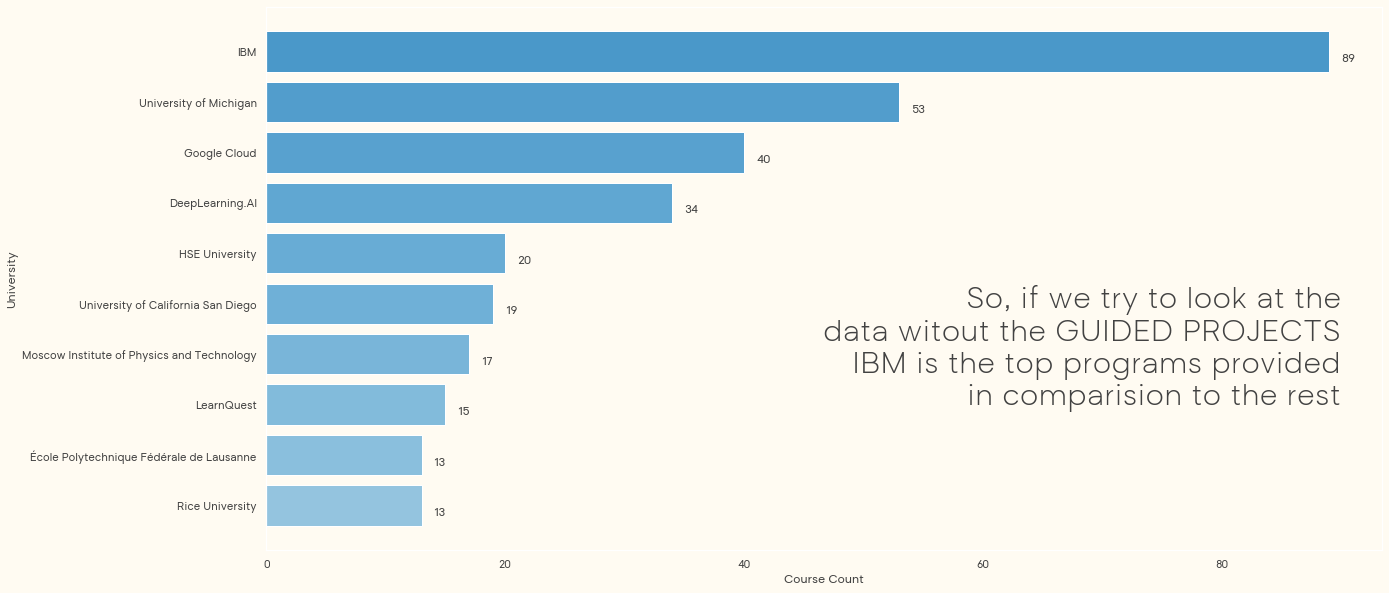

In [25]:
# fig = plt.figure(dpi= 250)
ax = plt.axes()
ax.set_facecolor(background)
topUni = df[df.type != 'GUIDED PROJECT'].university.value_counts()[:10][::-1]
plot = plt.barh(topUni.index, topUni.values, color= get_color_spectrum(.4, .6, 10, flipped= False, spectrum= 'Blues'))
plot_bar_values(plot, topUni.values, type_= 'h')
ax.set(xlabel= "Course Count", ylabel= "University")
desc = \
'''
So, if we try to look at the
data witout the GUIDED PROJECTS
IBM is the top programs provided
in comparision to the rest'''

ax.text(90, 2, desc, fontsize= 30, fontweight= 'light', ha= 'right');
plt.savefig(savepath + 'top10uniCourses2.png', bbox_inches= 'tight', transparent= True)

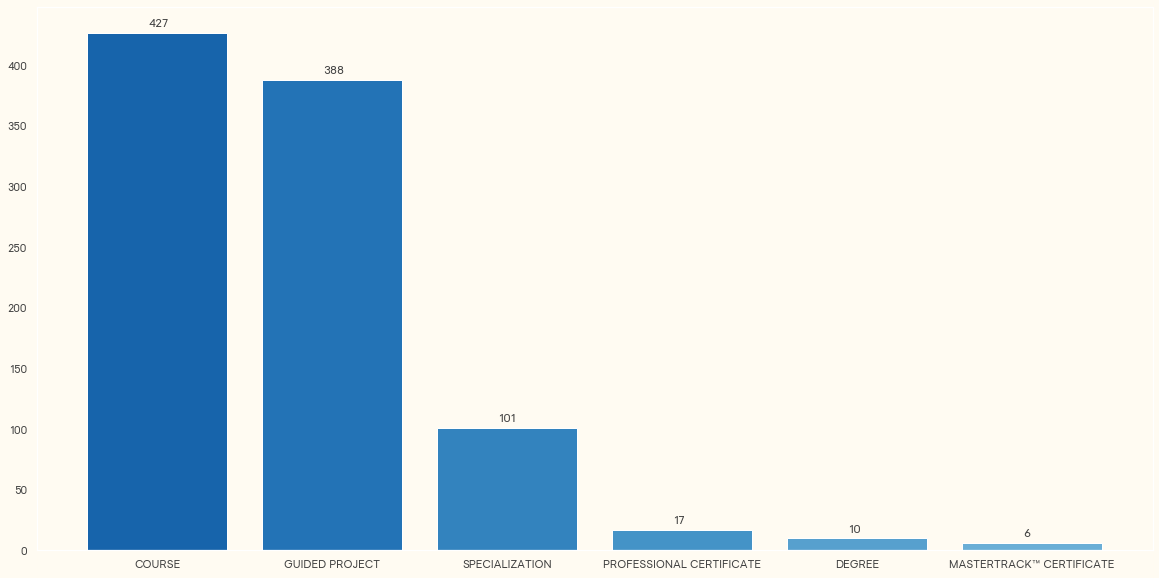

In [39]:
courseType = df.type.value_counts()
plot = plt.bar(courseType.index, courseType.values, color= get_color_spectrum(.8, .5, len(courseType), flipped= False, spectrum= 'Blues'))
plot_bar_values(plot, courseType.values, xoffset= 0.35, yoffset= 5)

(60.0, 0.0)

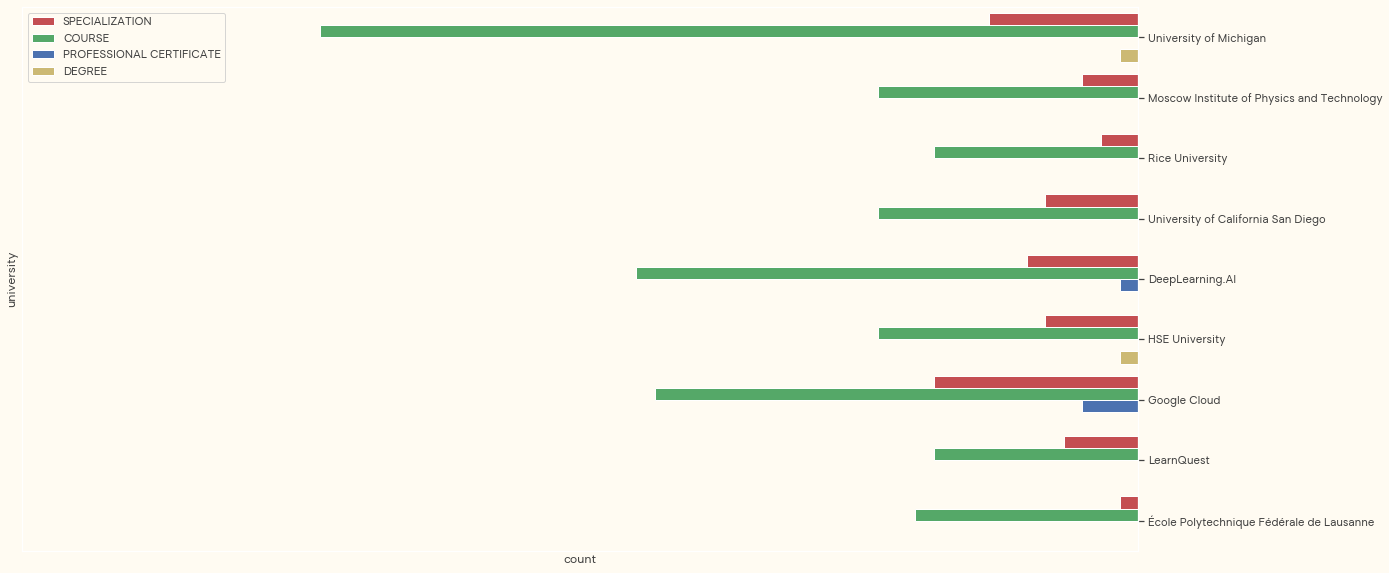

In [55]:
topUni.index[:-1]
topUniDF = df[df.university.isin(topUni.index[:-1])]
ax = plt.axes()
sns.countplot(y= 'university', data= topUniDF, hue= 'type', palette= ['r', 'g', 'b', 'y'], saturation= 1, ax= ax)
ax.yaxis.tick_right()
plt.legend(loc= 0)
ax.set_xticks([])
ax.set_xlim([60, 0])

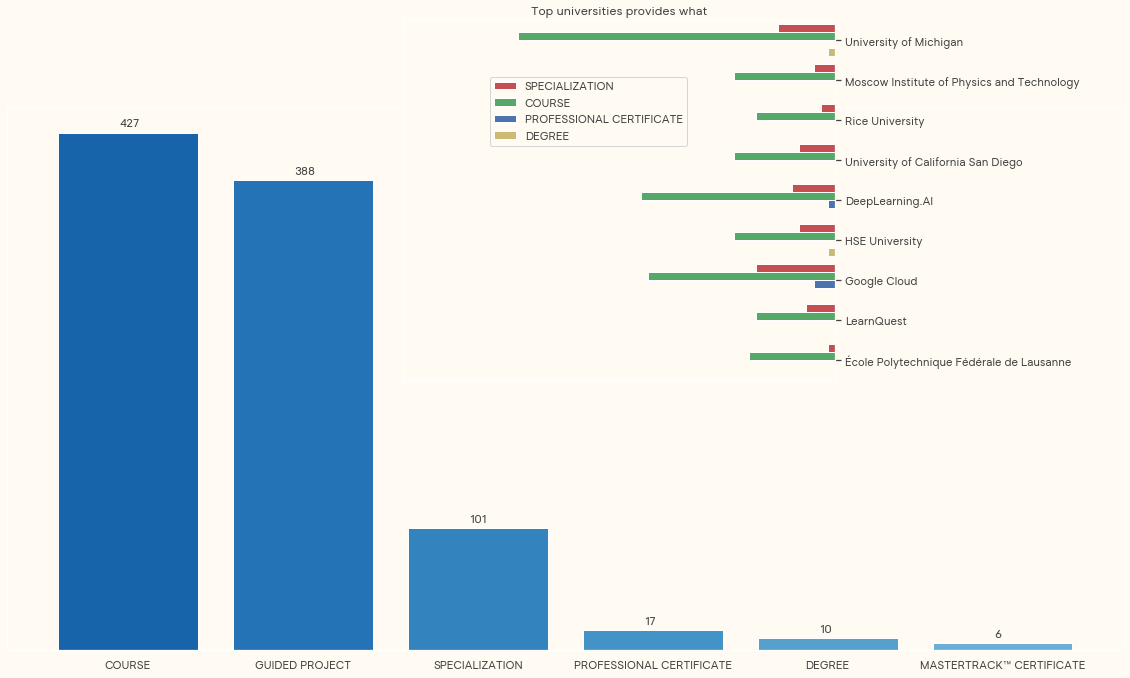

In [95]:
fig = plt.figure()
ax1 = plt.axes()
courseType = df.type.value_counts()
plot = plt.bar(courseType.index, courseType.values, color= get_color_spectrum(.8, .5, len(courseType), flipped= False, spectrum= 'Blues'))
plot_bar_values(plot, courseType.values, xoffset= 0.35, yoffset= 5)
ax1.set_yticks([])
ax2 = fig.add_axes([0.4, 0.5, 0.3, 0.5])


topUniDF = df[df.university.isin(topUni.index[:-1])]
sns.countplot(y= 'university', data= topUniDF, hue= 'type', palette= ['r', 'g', 'b', 'y'], saturation= 1, ax= ax2)
ax2.yaxis.tick_right()
plt.legend(loc= [0.2, 0.65])
ax2.set_xticks([])
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_xlim([60, 0])
ax2.set_title("Top universities provides what")
plt.savefig(savepath + 'coursetype.png', bbox_inches= 'tight', transparent= True)

In [96]:
uniRanked = df.groupby("university")[['review', 'votes']].agg({"review": "mean", "votes": "sum"}).sort_values(by= "votes", ascending= False)
uniRanked.dropna(inplace= True)
topRankers = uniRanked[:10]
bottomRankers = uniRanked[-10:]
both = pd.concat([topRankers, bottomRankers])[::-1]

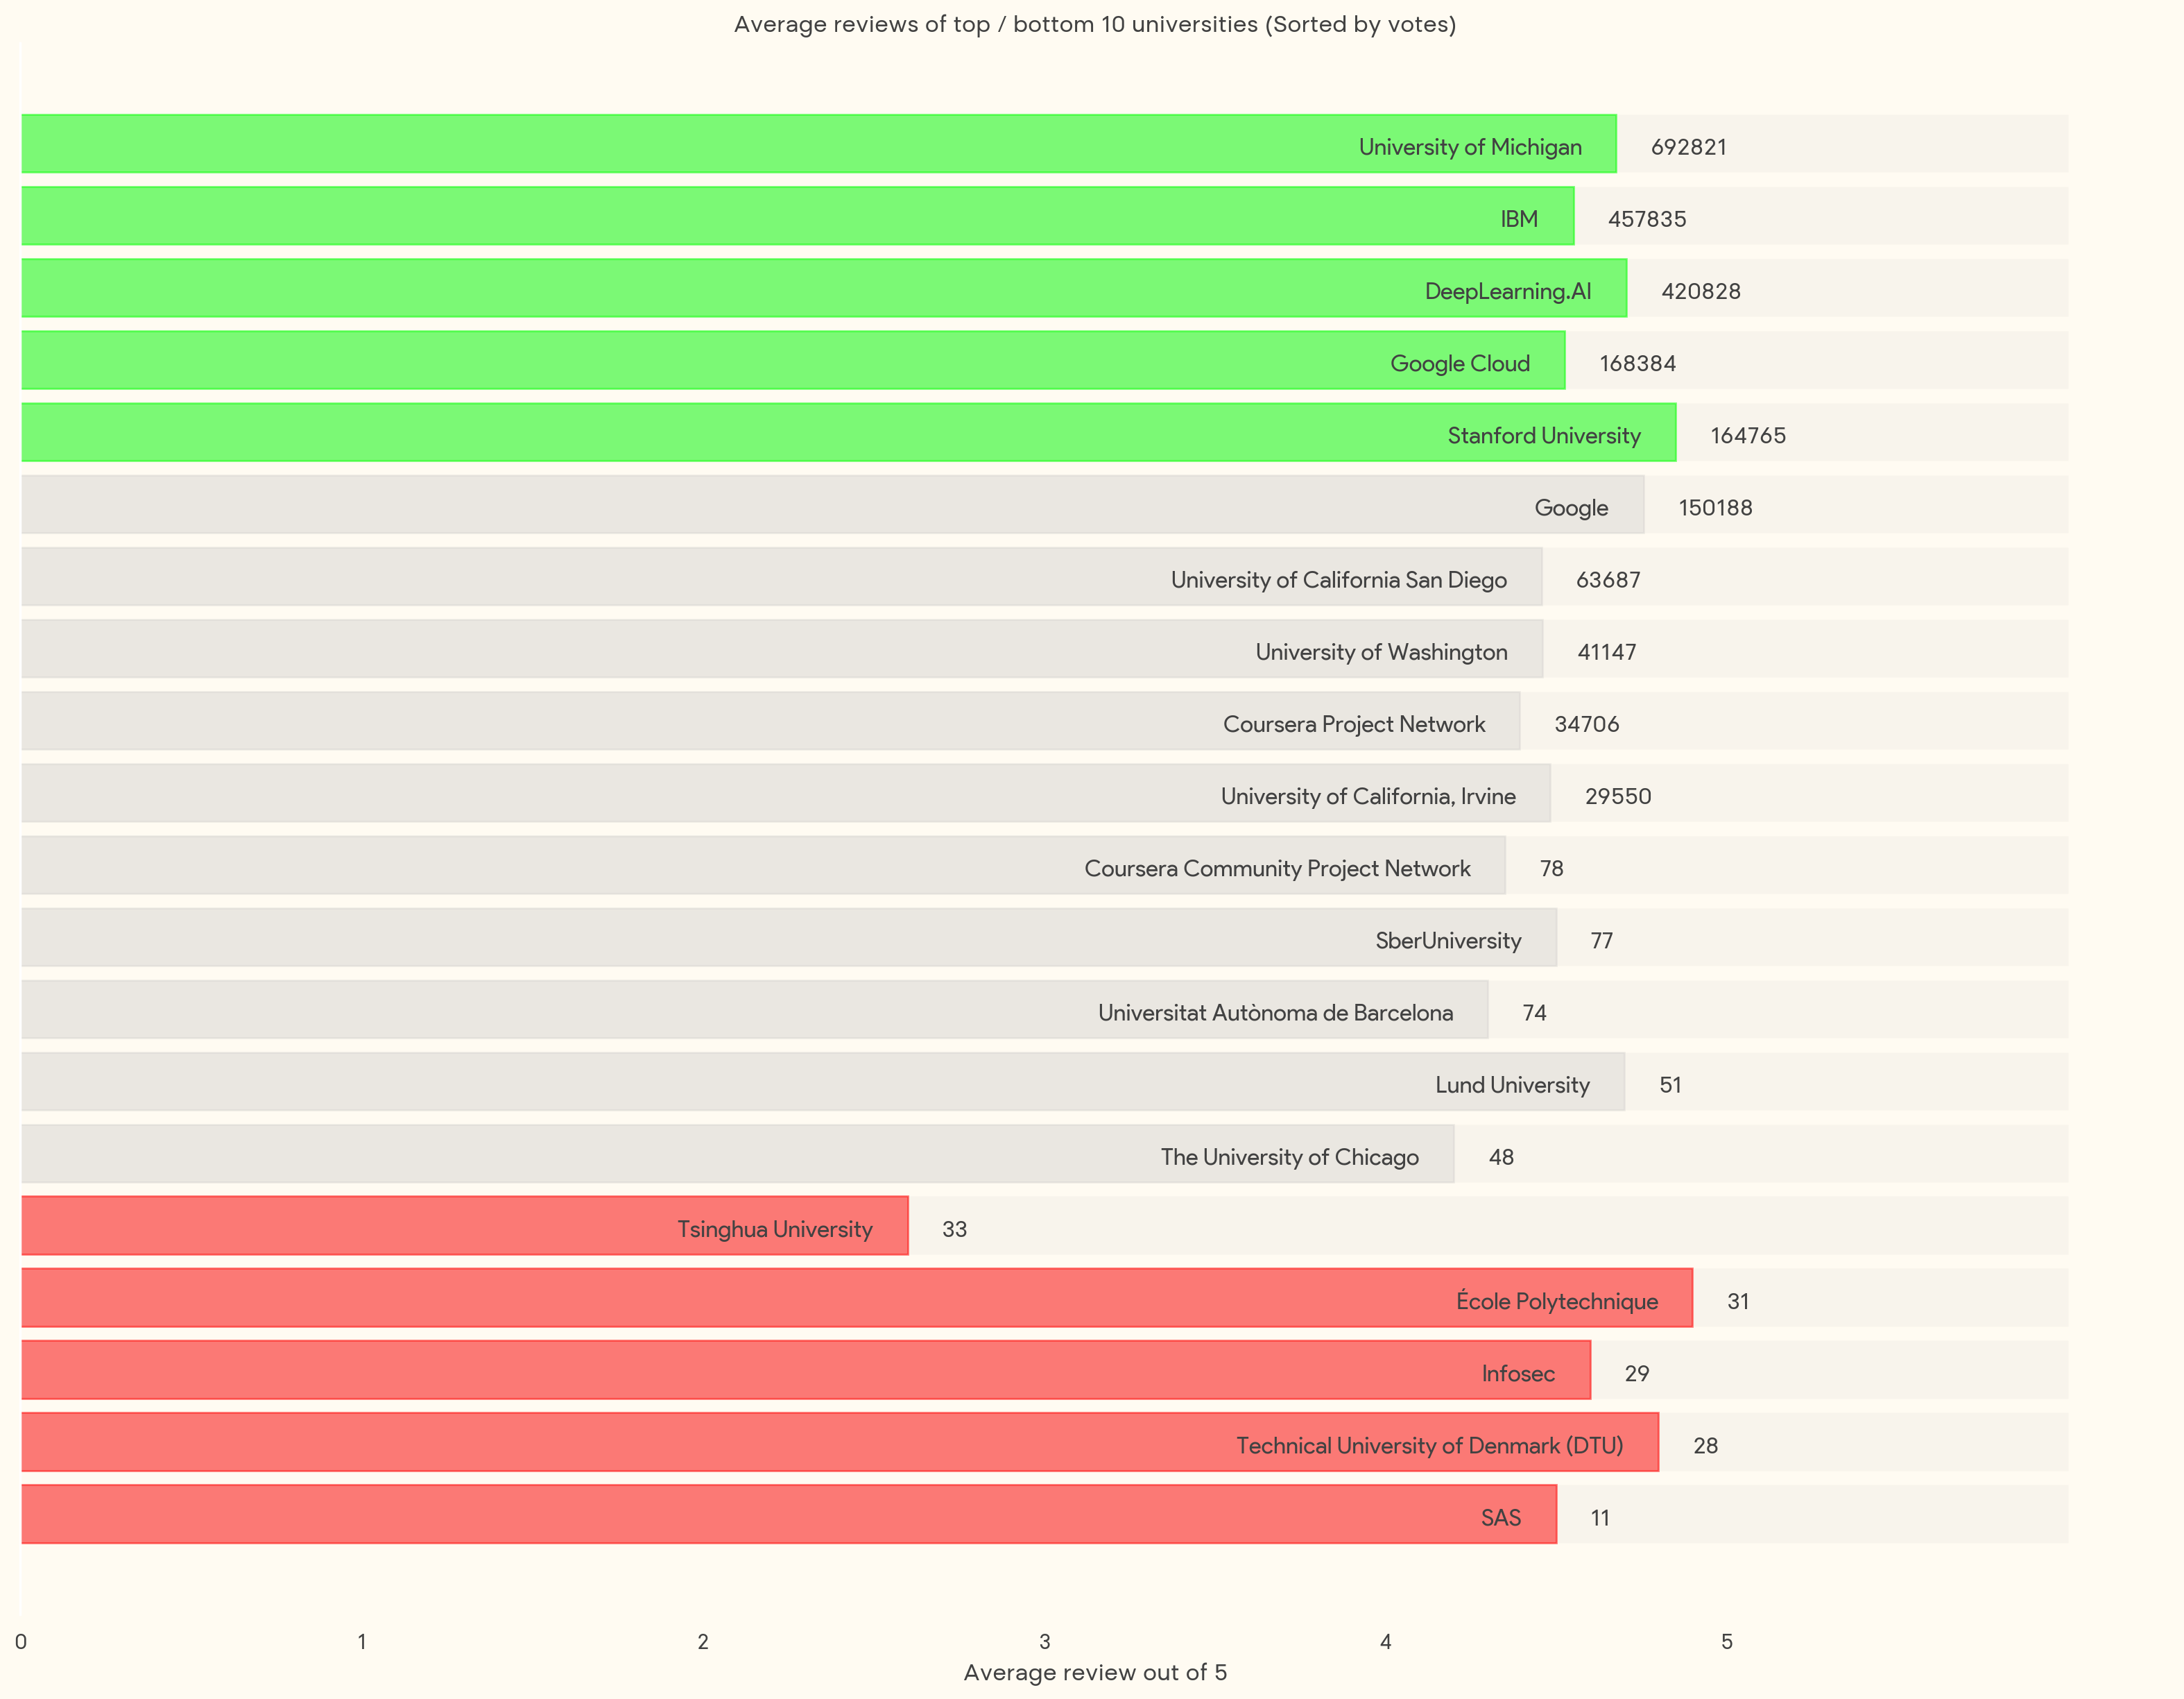

In [122]:
fig, ax = plt.subplots(1, 1, figsize= (20, 15), dpi= 200)


ax.barh(both.index, 6, color= 'grey', alpha= 0.05)
ax.barh(both.index, both.review)
ax.set_yticklabels([])
for side in ['right', 'top', 'bottom']:
    ax.spines[side].set_visible(False)
for patch in ax.patches[20:25]:
    patch.set_color((1, 0, 0, 0.5))
for patch in ax.patches[35:]:
    patch.set_color((0, 1, 0, 0.5))
for patch in ax.patches[25:35]:
    patch.set_color((.71, .71, .71,0.2))

    
for patch, val, names in zip(ax.patches[20:], both.votes, both.index):
    x = patch.get_width()
    y = patch.get_y()
    ax.text(x + 0.1, y + 0.25, str(int(val)))
    ax.text(x - 0.1, y + 0.25, str(names), ha= 'right', fontfamily= "product sans")
    
ax.set_xticks(range(0,6));
ax.set_title("Average reviews of top / bottom 10 universities (Sorted by votes)")
ax.set_xlabel("Average review out of 5")
plt.savefig(savepath + 'reviews.png', bbox_inches= 'tight', transparent= True)

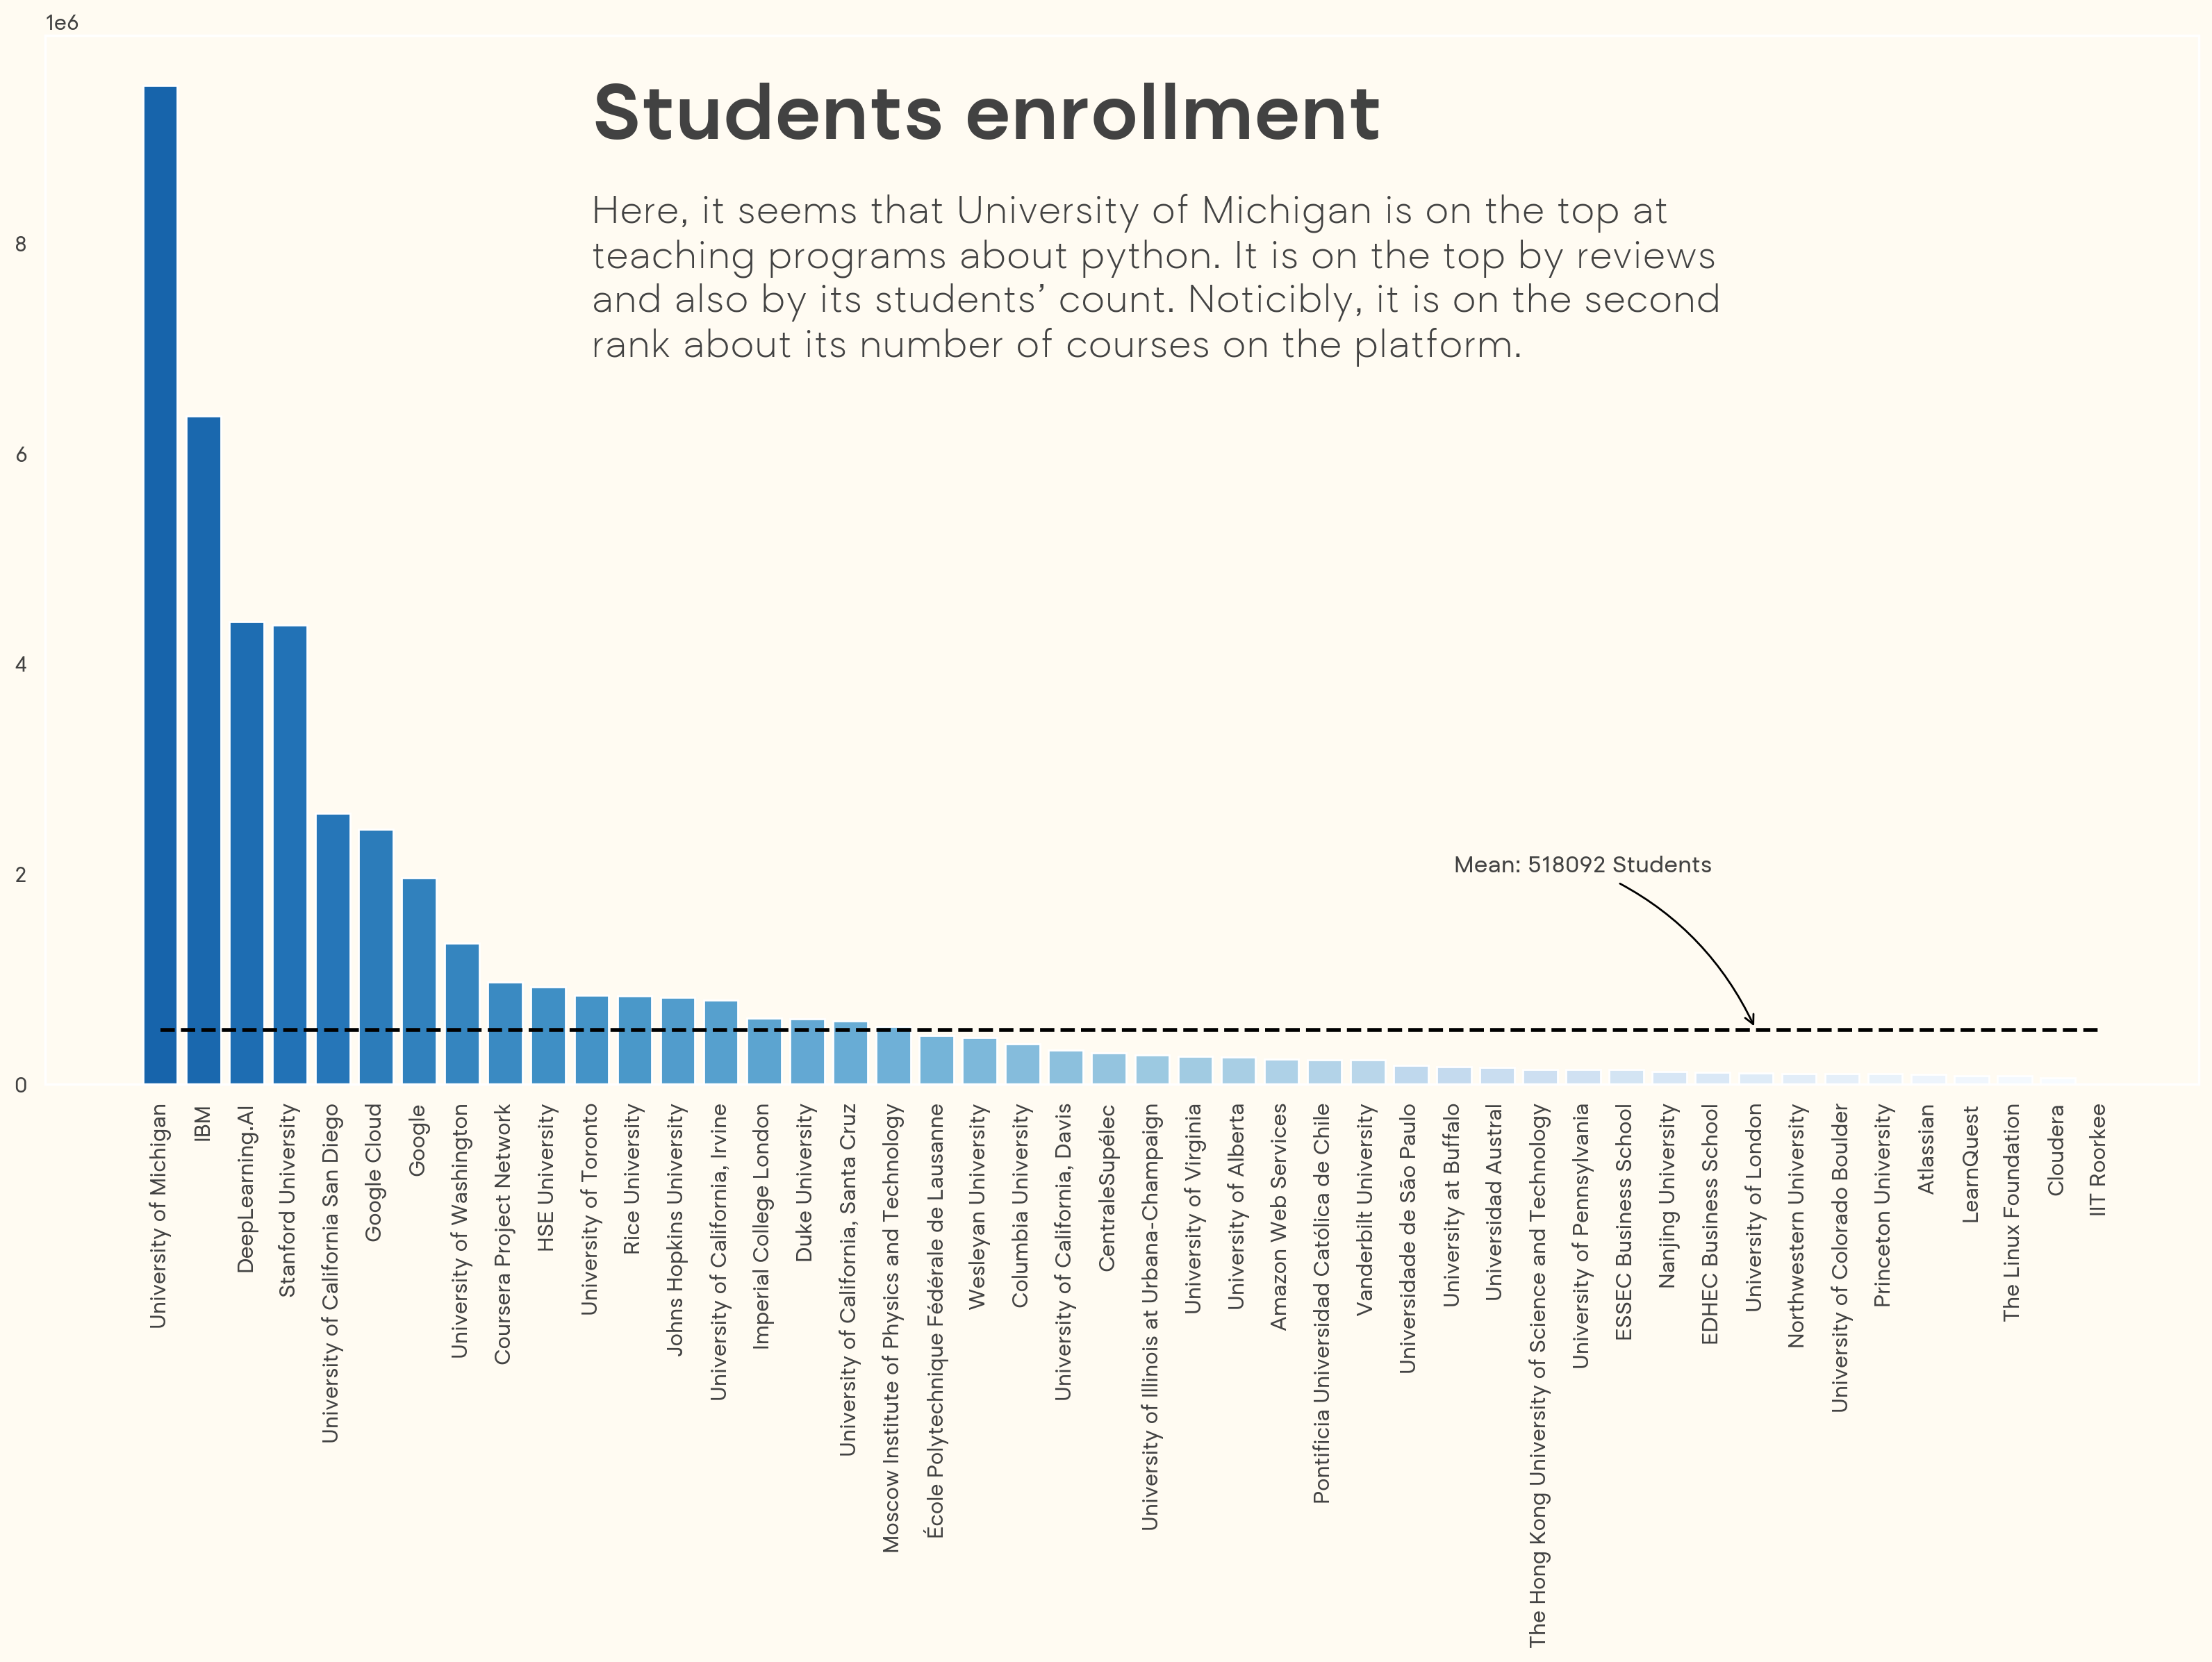

In [158]:
fig = plt.figure(dpi= 200)
uniStud = df.groupby("university")['students'].sum().sort_values(ascending= False).round(1)
unis = uniStud[:45]
plt.bar(unis.index, unis.values, color= get_color_spectrum(.0, .8, len(unis), spectrum= "Blues", flipped= True));
plt.xticks(rotation= 90);
plt.hlines(uniStud.mean(), xmin= 0, xmax= uniStud.index[-1], ls= '--', lw= 2, color= 'black')
plt.annotate("Mean: 518092 Students", xy= ("University of London", 518092), xytext= (30, 2018092),
             arrowprops= dict(arrowstyle= "->", connectionstyle= "arc3, rad= -0.2", color= "black"));

title = 'Students enrollment'
desc = \
'''
Here, it seems that University of Michigan is on the top at
teaching programs about python. It is on the top by reviews
and also by its students' count. Noticibly, it is on the second
rank about its number of courses on the platform.
'''
plt.text(10, 90_00_000, title, fontdict= dict(fontsize= 40, fontweight= 'bold'))
plt.text(10, 65_00_000, desc, fontdict= dict(fontsize= 20, fontweight= 'light'));
plt.savefig(savepath + 'students.png', bbox_inches= 'tight', transparent= True)

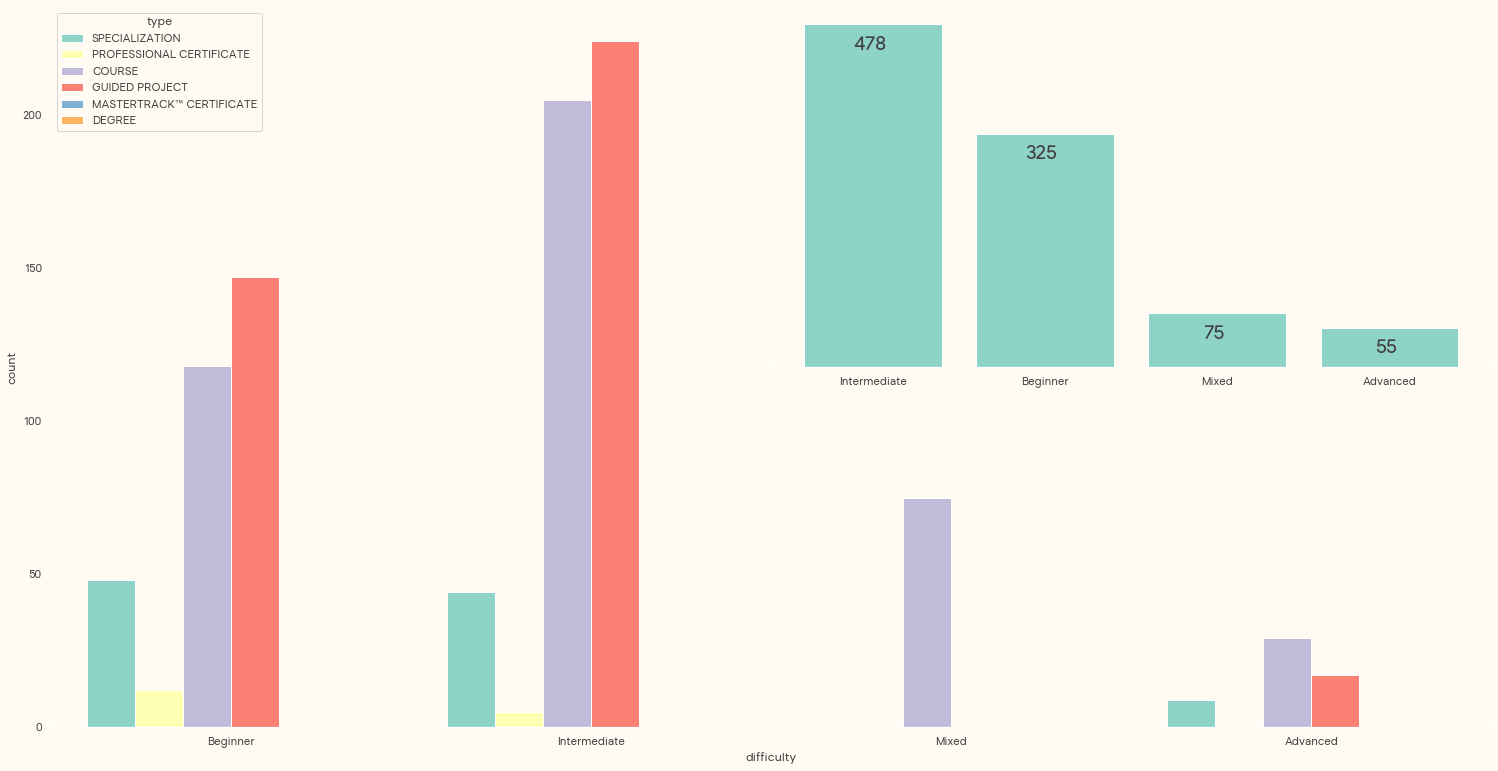

In [159]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax2 = fig.add_axes([1.5,1.5,0.5,0.5])
sns.countplot(x= "difficulty", data= df, hue= 'type', ax = ax, saturation= 1)

diff = df.difficulty.value_counts()
plot = ax2.bar(diff.index, diff.values)
ax2.set_yticks([])
plot_bar_values(plot, diff.values, xoffset= 0.38, yoffset= -35, fontdict={"fontfamily": "product sans", "size": 20}, ha= 'center')

plt.savefig(savepath + 'difficulty.png', bbox_inches= 'tight', transparent= True)

In [162]:
df.difficulty.unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced', None],
      dtype=object)

In [163]:
Beginner = df[df.difficulty == 'Beginner'].sort_values(by= "students", ascending= False)[:3]
Beginner

,university,course,type,review,votes,students,difficulty
0,University of Michigan,Python for Everybody,SPECIALIZATION,4.8,225236.0,2400000.0,Beginner
381,Google,Google IT Support,PROFESSIONAL CERTIFICATE,4.8,99156.0,900000.0,Beginner
6,IBM,IBM Data Science,PROFESSIONAL CERTIFICATE,4.6,74747.0,830000.0,Beginner


In [164]:
Intermediate = df[df.difficulty == 'Intermediate'].sort_values(by= "students", ascending= False)[:3]
Intermediate

,university,course,type,review,votes,students,difficulty
22,DeepLearning.AI,Deep Learning,SPECIALIZATION,4.8,123216.0,1100000.0,Intermediate
423,DeepLearning.AI,Neural Networks and Deep Learning,COURSE,4.9,106332.0,960000.0,Intermediate
3,University of Michigan,Applied Data Science with Python,SPECIALIZATION,4.5,29358.0,730000.0,Intermediate


In [165]:
Mixed = df[df.difficulty == 'Mixed'].sort_values(by= "students", ascending= False)[:3].copy()
Mixed

,university,course,type,review,votes,students,difficulty
327,Stanford University,Machine Learning,COURSE,4.9,160251.0,4200000.0,Mixed
7,University of Michigan,Programming for Everybody (Getting Started wit...,COURSE,4.8,189604.0,2200000.0,Mixed
40,University of Michigan,Python Data Structures,COURSE,4.9,84054.0,750000.0,Mixed


In [166]:
Mixed.iloc[1, 1] = 'Programming for Everybody\n(Getting Started with Python)'

In [167]:
Advanced = df[df.difficulty == 'Advanced'].sort_values(by= "students", ascending= False)[:3]
Advanced

,university,course,type,review,votes,students,difficulty
339,HSE University,Advanced Machine Learning,SPECIALIZATION,4.4,3853.0,320000.0,Advanced
522,HSE University,Introduction to Deep Learning,COURSE,4.5,1774.0,160000.0,Advanced
31,IBM,Advanced Data Science with IBM,SPECIALIZATION,4.3,2705.0,110000.0,Advanced


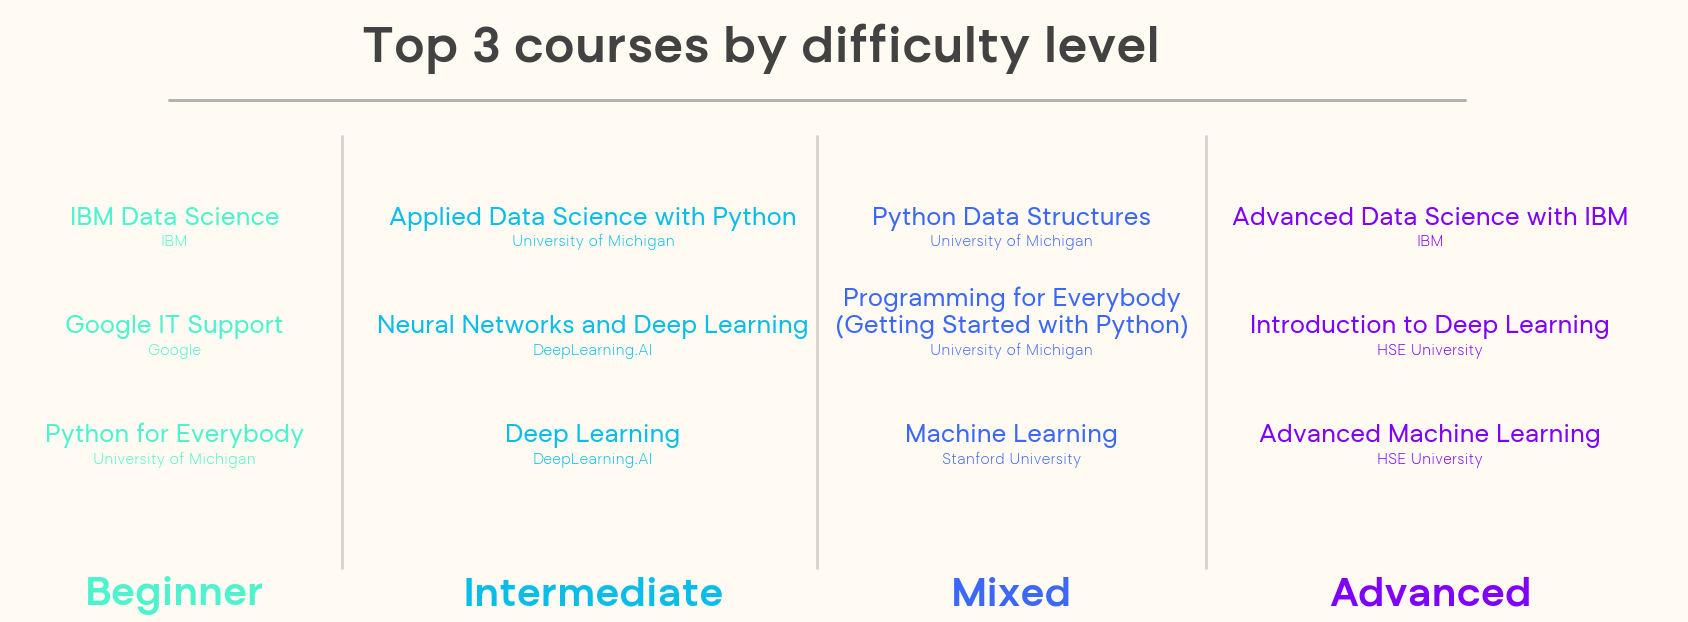

In [181]:
import matplotlib.lines as line
fig = plt.figure(figsize= (30, 10))
ax = plt.axes()
ax.set(xticks= [], yticks= [])
for side in ["left", 'right', 'bottom', 'top']:
    ax.spines[side].set_visible(False)

plt.text(0.45, 0.9, "Top 3 courses by difficulty level", ha= "center",
         fontfamily= 'Neuville', fontweight= "bold", fontsize= 50)

l1 = line.Line2D([0.2, 0.8], [0.75, 0.75], transform=fig.transFigure, figure=fig, color = 'grey', linestyle='-',linewidth = 3, alpha = 0.6)
fig.lines.extend([l1])


for course, x, color in zip(["Beginner", "Intermediate", "Mixed", "Advanced"], [0.1, 0.35, 0.60, 0.85], get_color_spectrum(0, .4, 4, spectrum= 'rainbow', flipped= True)):
    plt.text(x, -0.1, course, ha= "center",  fontfamily= 'Neuville', fontweight= "bold", fontsize= 40, color= color)
    for row, ofset in zip(eval(course)[['course', 'university']].iterrows(), np.arange(0.2, 0.7, 0.2)):
        plt.text(x, ofset, row[1][0], ha= "center", fontfamily= 'Neuville', fontweight= 'regular', fontsize= 25, color= color)
        plt.text(x, ofset - 0.04, row[1][1], fontfamily= 'Neuville', fontweight= 5, fontsize= 15,  ha= "center", color= color)
        
l2 = line.Line2D([0.28, 0.28], [0.1, 0.70], transform=fig.transFigure, figure=fig, color = 'grey', linestyle='-',linewidth = 3, alpha = 0.3)
l3 = line.Line2D([0.50, 0.50], [0.1, 0.70], transform=fig.transFigure, figure=fig, color = 'grey', linestyle='-',linewidth = 3, alpha = 0.3)
l4 = line.Line2D([0.68, 0.68], [0.1, 0.70], transform=fig.transFigure, figure=fig, color = 'grey', linestyle='-',linewidth = 3, alpha = 0.3)
fig.lines.extend([l2, l3, l4])
plt.savefig(savepath + 'difficultyCourses.png', bbox_inches= 'tight', transparent= True)

In [182]:
import re

In [183]:
pattern = r'(\bA\.?I\.?\b)|(\bM\.?L\.?\b)|(\bD\.?L\.?\b)|(\bN\.?L\.?P\.?\b)(Artificial Intelligence)|(Machine Learning)|(Deep Learning)|(Reinforcement Learning)|(Tensor\s?Flow)|(Natural Language Processing)|(Neural Networks?)'

In [184]:
with_MlAiDl = df[df.course.str.match(pattern, flags= re.IGNORECASE)]

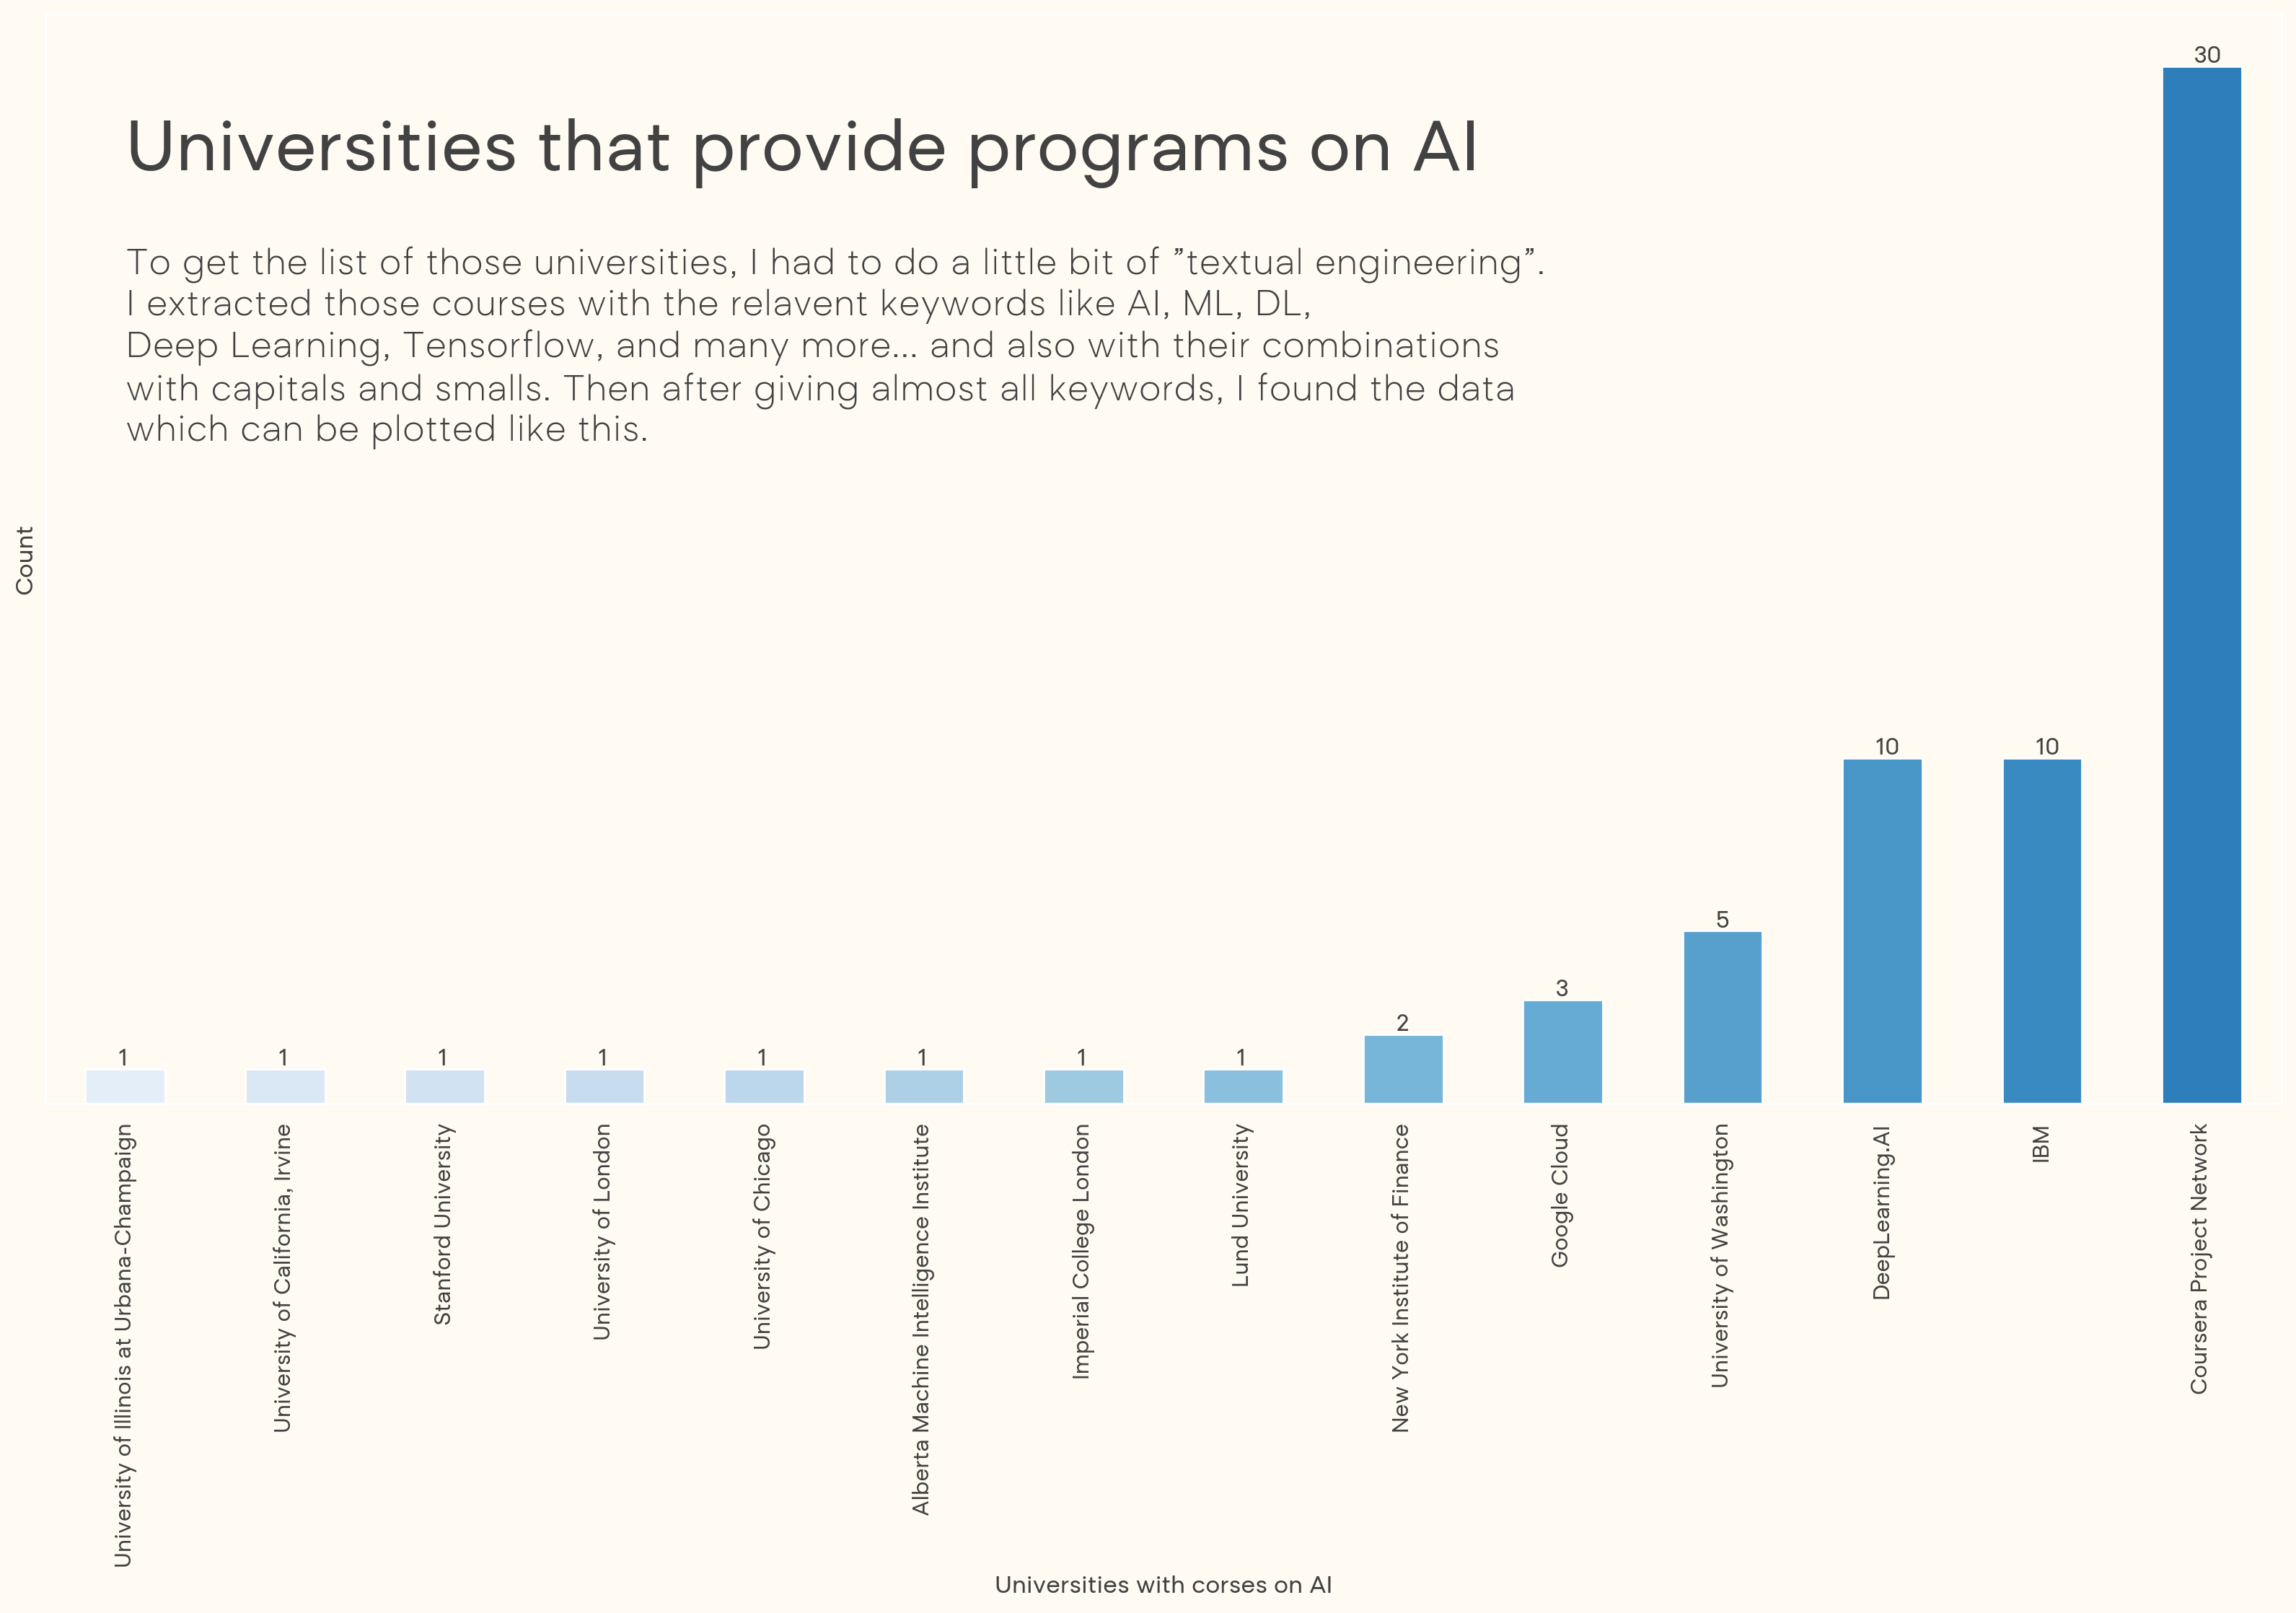

In [249]:
plt.figure(dpi= 200)
ax = plt.axes()
plot = with_MlAiDl.university.value_counts()[::-1].plot(kind= 'bar', color= get_color_spectrum(0.1, .7, 14, spectrum= 'Blues'))
plot_bar_values(plot, with_MlAiDl.university.value_counts()[::-1].values, type_= 'v', xoffset= 0.2, yoffset= 0.1)
ax.set_xlabel("Universities with corses on AI")
ax.set_ylabel("Count")

title = "Universities that provide programs on AI"
desc = \
'''
To get the list of those universities, I had to do a little bit of "textual engineering".
I extracted those courses with the relavent keywords like AI, ML, DL,
Deep Learning, Tensorflow, and many more... and also with their combinations
with capitals and smalls. Then after giving almost all keywords, I found the data
which can be plotted like this.
'''
ax.set_yticks([])
ax.text(0, 27, title, fontsize= 35)
ax.text(0, 18, desc, fontsize= 18, fontweight= 'light');
plt.savefig(savepath + 'AICourses.png', bbox_inches= 'tight', transparent= True)

In [192]:
top5_AI = with_MlAiDl.university.value_counts().index[:5]
top5_AI

Index(['Coursera Project Network', 'IBM', 'DeepLearning.AI',
       'University of Washington', 'Google Cloud'],
      dtype='object')

In [193]:
top5_AI_DF = with_MlAiDl[with_MlAiDl.university.isin(top5_AI)]

In [194]:
top5_other_DF = df[df.university.isin(top5_AI) & ~(df.index.isin(top5_AI_DF.index))]

In [195]:
top5_AI_DF.groupby("university")['students'].sum()

university
Coursera Project Network      61200.0
DeepLearning.AI             2469000.0
Google Cloud                 121700.0
IBM                          236600.0
University of Washington    1084000.0
Name: students, dtype: float64

In [196]:
top5_other_DF.groupby("university")['students'].sum()

university
Coursera Project Network     910900.0
DeepLearning.AI             1934600.0
Google Cloud                2301600.0
IBM                         6122900.0
University of Washington     259200.0
Name: students, dtype: float64

In [197]:
AI_vs_REST = pd.DataFrame({"AI": top5_AI_DF.groupby("university")['students'].sum(), "REST": top5_other_DF.groupby("university")['students'].sum()})
AI_vs_REST

,AI,REST
university,,
Coursera Project Network,61200.0,910900.0
DeepLearning.AI,2469000.0,1934600.0
Google Cloud,121700.0,2301600.0
IBM,236600.0,6122900.0
University of Washington,1084000.0,259200.0


In [198]:
patches, _, __ = ax.pie(AI_vs_REST.iloc[0], colors= get_color_spectrum(.6, .8, 2), autopct= "%.2f%%")

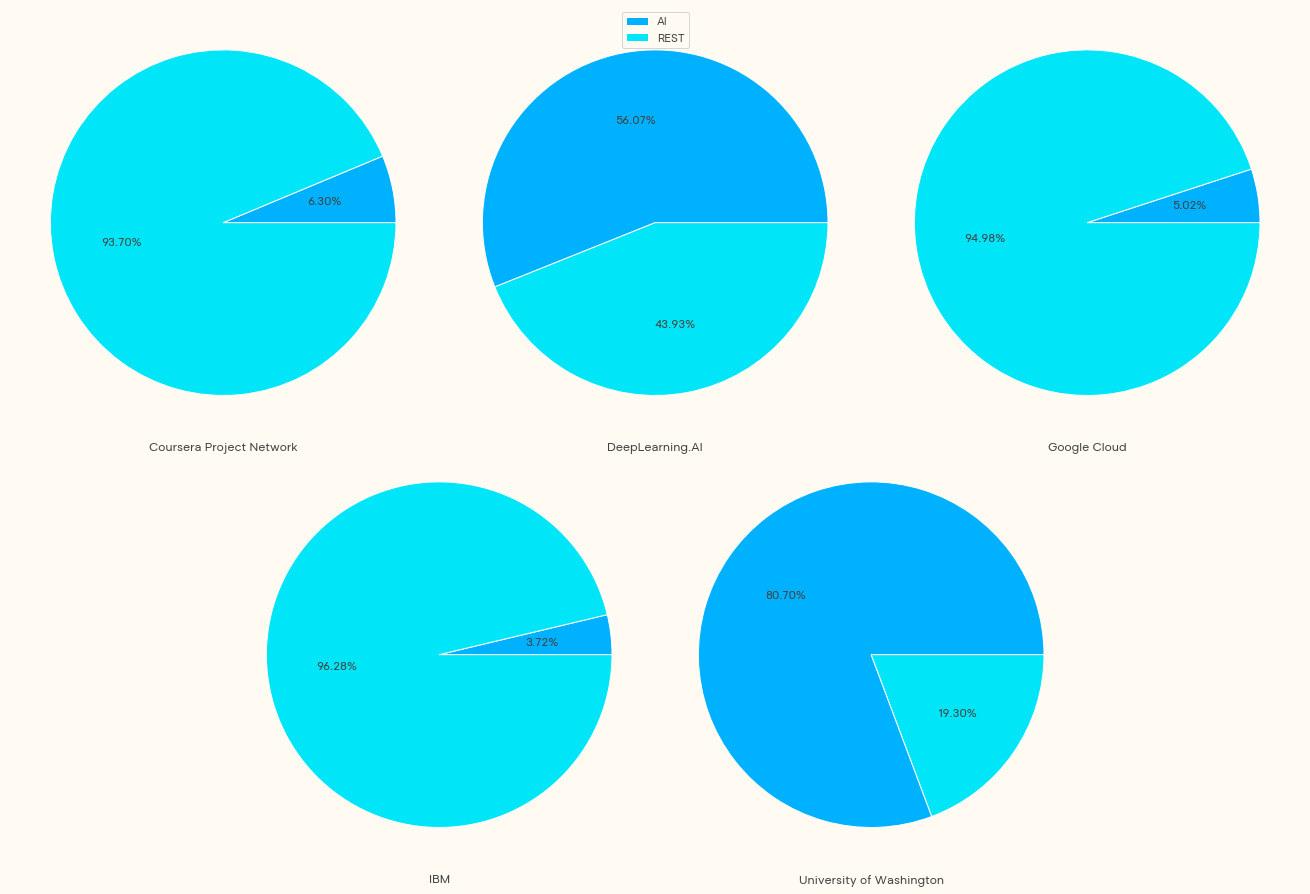

In [250]:
fig = plt.figure(figsize= (20, 20))

ax1 = fig.add_axes([0, 0.5, 0.3, 0.3])
ax2 = fig.add_axes([0.3, 0.5, 0.3, 0.3])
ax3 = fig.add_axes([0.6, 0.5, 0.3, 0.3])

ax4 = fig.add_axes([0.15, 0.2, 0.3, 0.3])
ax5 = fig.add_axes([0.45, 0.2, 0.3, 0.3])

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.set(xticks= [], yticks= [])
    patches, _, __ = ax.pie(AI_vs_REST.iloc[idx], colors= get_color_spectrum(.3, .35, 2, spectrum= 'jet'), autopct= "%.2f%%")
    ax.set_xlabel(AI_vs_REST.index[idx])
ax2.legend(patches, ["AI", "REST"], loc=9);
plt.savefig(savepath + 'AIpie.png', bbox_inches= 'tight', transparent= True)

In [251]:
import string
from nltk.corpus import stopwords
import re

In [252]:
puncs = string.punctuation
puncs

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [253]:
pattern = r'[!"#$%&\'()*+,-./:;<=>?@\[\]^_`{|}~]'

In [254]:
top50_terms = df.iloc[df.votes.sort_values(ascending= False).index][:50]

In [255]:
def remove(str_):
    return re.sub(pattern, '', str_)

In [256]:
top50_terms.course = top50_terms.course.apply(remove)

In [257]:
terms = top50_terms.course.str.lower().str.get_dummies(" ")

In [258]:
stopwords = stopwords.words("english")

In [259]:
stopwords.index("it")

26

In [260]:
stopwords.pop(26)

'it'

In [261]:
valids = terms.columns[~(terms.columns.str.lower().isin(stopwords))]

In [262]:
terms = terms.loc[:, valids]

In [263]:
most_used = terms.sum(axis= 0).sort_values(ascending= False)

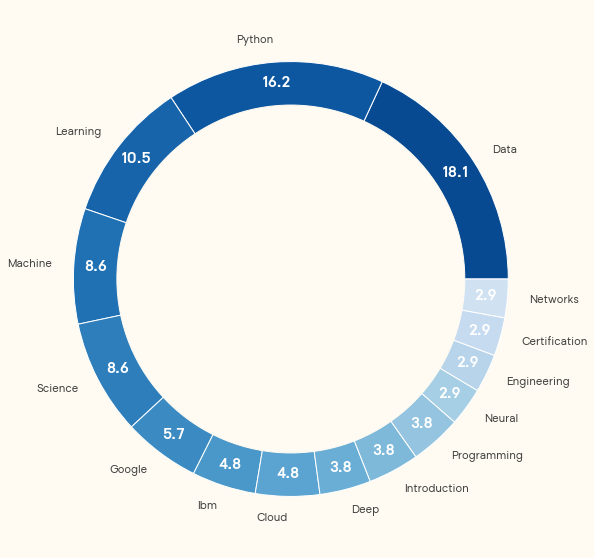

In [268]:
ax = plt.axes()
_, _, autopects = ax.pie(most_used[:15], colors= get_color_spectrum(.2, .9, 15, spectrum= "Blues", flipped= True), labels=most_used.index.str.title()[:15], 
       autopct= "%.1f", pctdistance=.9)
my_circle=plt.Circle( (0,0), 0.8, color=background)
plt.setp(autopects, **{'color':'white', 'weight':'bold', 'fontsize':15.5})

ax.add_artist(my_circle)
plt.savefig(savepath + 'ring.png', bbox_inches= 'tight', transparent= True)

In [269]:
courses = df.course.apply(remove)

In [270]:
from wordcloud import WordCloud, STOPWORDS

In [271]:
all_terms = []
courses.apply(lambda x: all_terms.extend(x.lower().split()))

0      None
1      None
2      None
3      None
4      None
       ... 
944    None
945    None
946    None
947    None
948    None
Name: course, Length: 949, dtype: object

In [272]:
all_terms = pd.Series(all_terms)
all_terms = all_terms[~(all_terms.isin(stopwords))]

In [273]:
all_terms.drop(all_terms[all_terms == "using"].index, inplace= True)

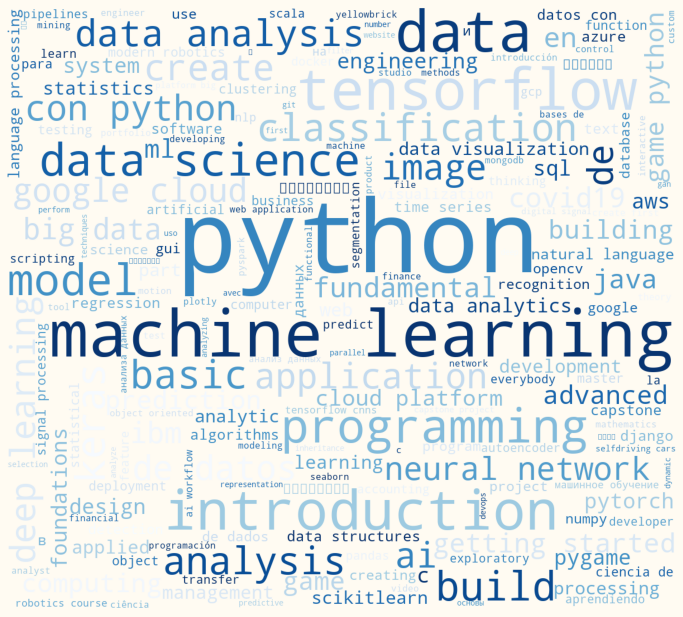

In [300]:
text = ' '.join(all_terms)

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = background, colormap='Blues', width = 1200,  height = 1080, max_words = 200).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [295]:
plt.imsave(savepath + "wordcloud.png", wordcloud)

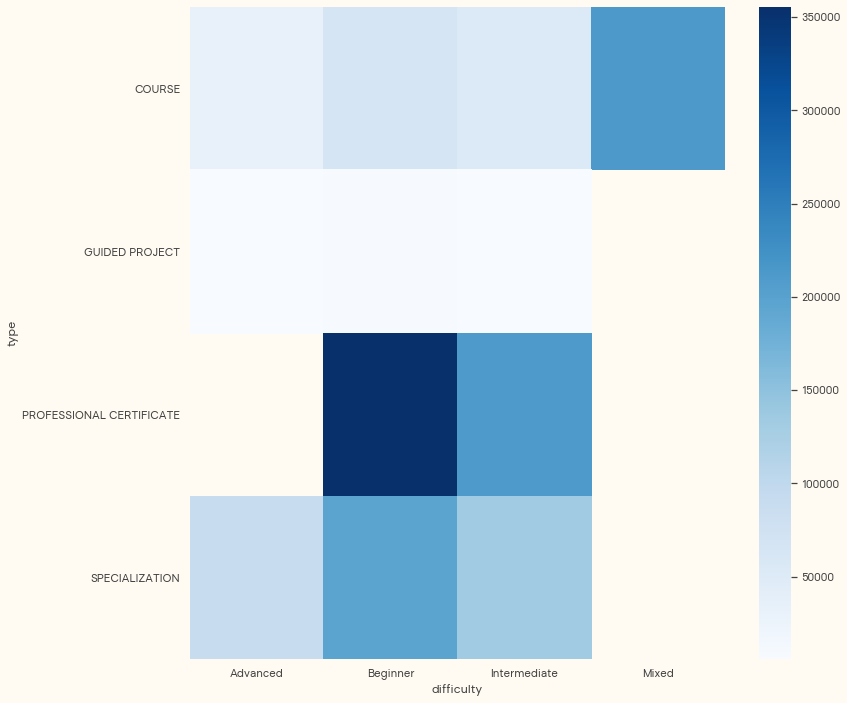

In [306]:
sns.heatmap(df.pivot_table(index= 'type', columns= 'difficulty', values= 'students'), cmap= "Blues")
plt.yticks(rotation= 0)
plt.savefig(savepath + 'heatmap.png', bbox_inches= 'tight', transparent= True)